### 주식 데이터 
https://financedata.github.io/posts/finance-data-reader-users-guide.html

In [1]:
#!pip install -U finance-datareader

import FinanceDataReader as fdr

import numpy as np
import pandas as pd 

import time

from dateutil.parser import parse
from dateutil.relativedelta import relativedelta

In [ ]:
# 코스피
#df = fdr.DataReader('KS11', '2015')
#df['Close'].plot()

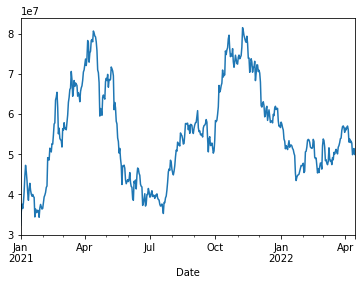

In [3]:
# 비트코인
df = fdr.DataReader('BTC/KRW', '2021')
df['Close'].plot();

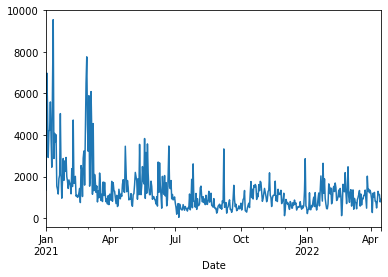

In [5]:
# 비트코인
df['Volume'].plot();

In [12]:
df['ym'] = df.index.strftime('%Y-%m')

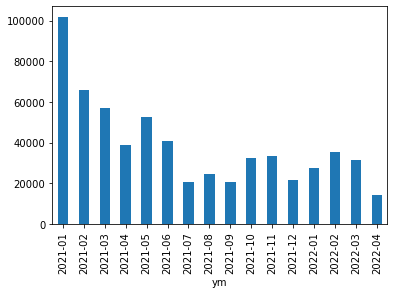

In [16]:
df.groupby('ym')['Volume'].sum().plot(kind='bar');

In [7]:
# 집계 4년치 월 생성
tickers = ['JP225','US500','STOXX50','KS11','BTC/KRW']

dates = []
for y in ['2018', '2019', '2020', '2021']:
    for m in np.arange(1,13):
        if m < 10:
            dates.append(y + '-0' + str(m))
        else:
            dates.append(y + '-' + str(m))

In [20]:
def get_ret(df, ticker, date):

    def get_bmonth(date):
        m6 = parse(date+'-01') - relativedelta(months=6)
        m1 = parse(date+'-01') - relativedelta(months=1)
        return m6.strftime('%Y-%m'), m1.strftime('%Y-%m')

    m6, m1 = get_bmonth(date)

    ret_6m = df.loc[m6:m1]['Change'].mean()
    ret_now = df.loc[date]['Change'].mean()

    return ret_6m, ret_now

In [15]:
# 이동 평균 계산식 수정 #######################################################################################
# https://wendys.tistory.com/178
>>>  df['sma200'] = df['Close'].rolling(200).mean()

In [22]:
results = []

for ticker in tickers:
    df = fdr.DataReader(ticker, '2017')
    
    for date in dates:
        try:
            ret_6m, ret_now = get_ret(df, ticker, date)
            results.append([date, ticker, ret_6m, ret_now])
        except:
            print(ticker, date)

In [26]:
res = pd.DataFrame(results)
res.columns = ['date','ticker','ret_bef', 'ret']
res.tail()

,date,ticker,ret_bef,ret
235,2021-08,BTC/KRW,0.002372,0.004839
236,2021-09,BTC/KRW,0.001040,-0.000560
237,2021-10,BTC/KRW,-0.000855,0.010432
238,2021-11,BTC/KRW,0.001004,-0.000580
239,2021-12,BTC/KRW,0.003163,-0.006703


In [32]:
d1 = res.pivot(index='date', columns='ticker', values='ret_bef')
d1.columns = [ x + '_b' for x in d1.columns ]
d1.tail()

,BTC/KRW_b,JP225_b,KS11_b,STOXX50_b,US500_b
date,,,,,
2021-08,0.002372,-0.000035,0.000632,0.001292,0.001371
2021-09,0.001040,-0.000180,0.000502,0.001135,0.001357
2021-10,-0.000855,0.000143,0.000047,0.000288,0.000667
2021-11,0.001004,0.000093,-0.000443,0.000557,0.000791
2021-12,0.003163,-0.000231,-0.000934,0.000088,0.000675


In [33]:
d2 = res.pivot(index='date', columns='ticker', values='ret')

In [34]:
df = d1.merge(d2, left_index=True, right_index=True)
df.head()

,BTC/KRW_b,JP225_b,KS11_b,STOXX50_b,US500_b,BTC/KRW,JP225,KS11,STOXX50,US500
date,,,,,,,,,,
2018-01,0.011858,0.000781,0.000274,0.000153,0.000783,-0.013674,0.000816,0.001814,0.001368,0.002619
2018-02,0.008980,0.000883,0.000559,0.000364,0.001058,0.003386,-0.002268,-0.003022,-0.002335,-0.001942
2018-03,0.006840,0.000668,0.000253,0.000063,0.000787,-0.012939,-0.001219,0.000400,-0.001043,-0.001219
2018-04,0.004519,0.000330,0.000210,-0.000506,0.000419,0.009930,0.002335,0.001362,0.002570,0.000190
2018-05,0.003780,0.000241,0.000007,-0.000275,0.000277,-0.006071,-0.000562,-0.001840,-0.001604,0.000991


In [43]:
# 최고자산 인덱스 
df['best'] = df[d1.columns].idxmax(axis="columns")

In [44]:
df.head()

,BTC/KRW_b,JP225_b,KS11_b,STOXX50_b,US500_b,BTC/KRW,JP225,KS11,STOXX50,US500,best
date,,,,,,,,,,,
2018-01,0.011858,0.000781,0.000274,0.000153,0.000783,-0.013674,0.000816,0.001814,0.001368,0.002619,BTC/KRW_b
2018-02,0.008980,0.000883,0.000559,0.000364,0.001058,0.003386,-0.002268,-0.003022,-0.002335,-0.001942,BTC/KRW_b
2018-03,0.006840,0.000668,0.000253,0.000063,0.000787,-0.012939,-0.001219,0.000400,-0.001043,-0.001219,BTC/KRW_b
2018-04,0.004519,0.000330,0.000210,-0.000506,0.000419,0.009930,0.002335,0.001362,0.002570,0.000190,BTC/KRW_b
2018-05,0.003780,0.000241,0.000007,-0.000275,0.000277,-0.006071,-0.000562,-0.001840,-0.001604,0.000991,BTC/KRW_b


In [65]:
# 모든 자산이 이자율(2% 가정) 보다 큰지 체크 
interest = 0.02    

ser = df[d1.columns].max(axis=1)
#ser[ser < interest]

In [67]:
ser  ### 수익률이 너무 작다 ㅠ.ㅜ 

date
2018-01    0.011858
2018-02    0.008980
2018-03    0.006840
2018-04    0.004519
2018-05    0.003780
2018-06    0.000227
2018-07    0.000190
2018-08    0.000036
2018-09    0.000553
2018-10    0.000974
2018-11    0.000214
2018-12    0.000195
2019-01   -0.000583
2019-02   -0.000255
2019-03   -0.000185
2019-04   -0.000069
2019-05    0.000797
2019-06    0.004987
2019-07    0.007021
2019-08    0.007085
2019-09    0.006282
2019-10    0.005020
2019-11    0.003882
2019-12    0.001074
2020-01    0.000889
2020-02    0.000661
2020-03    0.000229
2020-04   -0.000434
2020-05    0.000775
2020-06    0.002295
2020-07    0.002409
2020-08    0.002093
2020-09    0.002398
2020-10    0.002918
2020-11    0.002420
2020-12    0.003661
2021-01    0.006176
2021-02    0.005929
2021-03    0.008012
2021-04    0.010229
2021-05    0.008956
2021-06    0.004849
2021-07    0.002313
2021-08    0.002372
2021-09    0.001357
2021-10    0.000667
2021-11    0.001004
2021-12    0.003163
dtype: float64

In [66]:
ser > interest

date
2018-01    False
2018-02    False
2018-03    False
2018-04    False
2018-05    False
2018-06    False
2018-07    False
2018-08    False
2018-09    False
2018-10    False
2018-11    False
2018-12    False
2019-01    False
2019-02    False
2019-03    False
2019-04    False
2019-05    False
2019-06    False
2019-07    False
2019-08    False
2019-09    False
2019-10    False
2019-11    False
2019-12    False
2020-01    False
2020-02    False
2020-03    False
2020-04    False
2020-05    False
2020-06    False
2020-07    False
2020-08    False
2020-09    False
2020-10    False
2020-11    False
2020-12    False
2021-01    False
2021-02    False
2021-03    False
2021-04    False
2021-05    False
2021-06    False
2021-07    False
2021-08    False
2021-09    False
2021-10    False
2021-11    False
2021-12    False
dtype: bool

In [56]:
# best 티커로 실투자 자산 구하기 



for i, row in df.iterrows():
    
    best = row['best'].split('_')[0]
    if row('BTC/KRW_b') > interest & row('JP225_b') > interest & row('KS11_b') > interest & row('STOXX50_b') & row('US500_b
    if best == 'BTC/KRW':
        print(row['BTC/KRW'])
    elif best == 'JP225':
        print(row['JP225'])
    elif best == 'KS11':
        print(row['KS11'])
    elif best == 'STOXX50':
        print(row['STOXX50'])
    elif best == 'US500':
        print(row['US500'])

-0.013674193548387096
0.003385714285714286
-0.012938709677419356
0.009929999999999998
-0.006070967741935485
0.00025714285714285693
0.0017047619047619045
0.0013043478260869566
0.00023157894736842112
-0.004218181818181819
0.0009095238095238096
-0.004889473684210525
0.0036714285714285716
0.0015578947368421051
0.0007904761904761903
0.0023699999999999997
-0.0029347826086956524
0.010153333333333335
-0.00281290322580645
-0.0005724137931034482
-0.004700000000000001
0.002935483870967742
-0.005890000000000001
0.0013476190476190478
-0.0009368421052631582
-0.005044444444444444
-0.004671428571428574
0.010379999999999999
0.003299999999999999
-0.0013666666666666673
0.006864516129032256
0.0009354838709677417
-0.0026833333333333336
0.007183870967741935
0.0109
0.01372258064516129
0.005400000000000001
0.013860714285714285
0.010677419354838713
-0.0005966666666666657
-0.013274193548387093
-0.0012833333333333336
0.0057483870967741935
0.004838709677419354
-0.0022809523809523813
0.0032047619047619056
-0.00058

In [57]:
df.tail()

,BTC/KRW_b,JP225_b,KS11_b,STOXX50_b,US500_b,BTC/KRW,JP225,KS11,STOXX50,US500,best
date,,,,,,,,,,,
2021-08,0.002372,-0.000035,0.000632,0.001292,0.001371,0.004839,0.001419,8.260588e-19,0.001191,0.001323,BTC/KRW_b
2021-09,0.001040,-0.000180,0.000502,0.001135,0.001357,-0.000560,0.002445,-2.168421e-03,-0.001577,-0.002281,US500_b
2021-10,-0.000855,0.000143,0.000047,0.000288,0.000667,0.010432,-0.000838,-1.663158e-03,0.002376,0.003205,US500_b
2021-11,0.001004,0.000093,-0.000443,0.000557,0.000791,-0.000580,-0.001815,-2.018182e-03,-0.001982,-0.000357,BTC/KRW_b
2021-12,0.003163,-0.000231,-0.000934,0.000088,0.000675,-0.006703,0.001632,2.218182e-03,0.002732,0.001995,BTC/KRW_b
